In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from natsort import natsorted
from tqdm import tqdm
warnings.filterwarnings("ignore")


# ***Stereo Matching***

dij =(Il(i) − Ir(j))^2/σ^2

σ = 2 and c0 = 1.

D(i, j) = min(D(i1, j1) + dij , D(i1, j) + c0, D(i, j1) + c0)

In [ ]:
def stereo_matching(left,right, c0 = 7, sigma = 2):
    rows = left.shape[0]
    cols = left.shape[1]
    
    left_disp=np.zeros((rows,cols))
    right_disp=np.zeros((rows,cols))
     
    for row in range (rows):
        #for each row we create an NxN matrix
        #where N is number of columns
        #print(row)
        D=np.zeros((cols,cols))
        
        # Disparity path matrix
        flagMat=np.zeros((cols,cols))
        
        # Initialize the cost matrix 
        for i in range(0,cols):
            D[i][0] = i*c0
            D[0][i] = i*c0

        for i in range (0,cols):
            for j in range(0,cols):  
                      
                if(left[row][i]>right[row][j]):
                    dij=((left[row][i]-right[row][j])**2)/(sigma**2)
                else:
                    dij=((right[row][j]-left[row][i])**2)/(sigma**2)
                
                #we take the minimum between 3 things
                #the element in the diagonal (i-1,j-1) + the current SSD
                #or the element above me (i-1,j) + occlusion cost (left occlusion)
                #or the element before me (i,j-1) + occlusion cost (right occlusion)    
                min1=D[i-1][j-1]+dij
                min2=D[i-1][j]+c0
                min3=D[i][j-1]+c0
                
                D[i][j]=cmin=min(min1,min2,min3)
                
                # Marking the path 
                if(min1==cmin):
                    flagMat[i][j]=1
                if(min2==cmin):
                    flagMat[i][j]=2
                if(min3==cmin):
                    flagMat[i][j]=3
        
        #Backtrack
        i=cols-1
        j=cols-1
        
        while (i!=0) and  (j!=0):
            if(flagMat[i][j]==1):
                #Diagonal
                left_disp[row][i]=np.absolute(i-j)
                right_disp[row][j]=np.absolute(j-i)
                i=i-1
                j=j-1
            elif(flagMat[i][j]==2):
                #Upwards
                #left is skipped then value of left disparty map of row i is zero
                left_disp[row][i]=0
                i=i-1
            elif(flagMat[i][j]==3):
                #Left
                #right is skipped then value of left disparty map of row j is zero
                right_disp[row][j]=0
                j=j-1
                
    return left_disp,right_disp

In [ ]:
left_disp, right_disp = stereo_matching(left[2], right[2])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

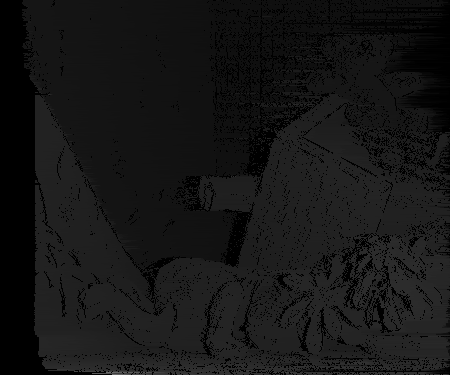

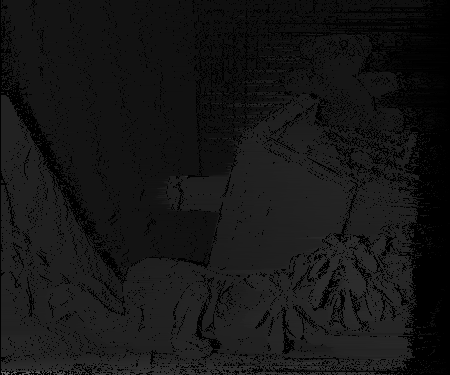

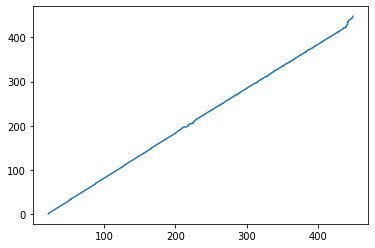

In [ ]:
cv2_imshow(left_disp)
cv2_imshow(right_disp)
plt.plot(points[:,0],points[:,1])

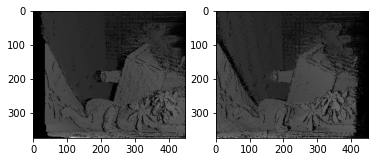

In [ ]:
plt.subplot(1,2,1)
plt.imshow(left_disp, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(right_disp, cmap = 'gray')
plt.show()

A good way to interpret your solution is to plot the alignment found for single scan line.
To display the alignment plot a graph of Il (horizontal) vs Ir (vertical). Begin at D(N, N ) and
work backwards to find the best path. If a pixel in Il

is skipped, draw a horizontal line. If a
pixel in Ir is skipped, draw a vertical line. Otherwise, the pixels are matched, and you draw a
diagonal line. The plot should end at (1, 1).

In [ ]:
left_row = left[2][0,:]
right_row = right[2][0,:]
cols = left[2].shape[1]


D = np.zeros((cols,cols))
flagMat = np.zeros((cols,cols))
sigma = 2
c0 = 7
points = []

for i in range(cols):
  for j in range(cols):
    if(left_row[i]>right_row[j]):
      dij=((left_row[i]-right_row[j])**2)/(sigma**2)
    else:
      dij=((right_row[j]-left_row[i])**2)/(sigma**2)

    min1=D[i-1][j-1]+dij
    min2=D[i-1][j]+c0
    min3=D[i][j-1]+c0
    
    D[i][j]=cmin=min(min1,min2,min3)
    
    # Marking the path 
    if(min1==cmin):
        flagMat[i][j]=1
    if(min2==cmin):
        flagMat[i][j]=2
    if(min3==cmin):
        flagMat[i][j]=3
        
        # Iterate the matched path and update the disparity value
i=cols-1
j=cols-1

while (i!=0) and  (j!=0):
    if(flagMat[i][j]==1):
        i=i-1
        j=j-1
        points.append([i,j])
    elif(flagMat[i][j]==2):
        i=i-1
        points.append([i,j])
    elif(flagMat[i][j]==3):
        j=j-1
        points.append([i,j])

points = np.array(points)

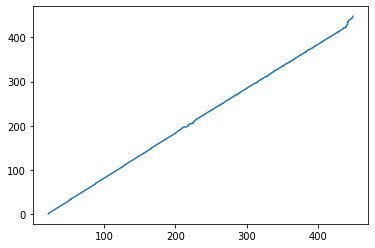

In [ ]:
plt.plot(points[:,0],points[:,1])

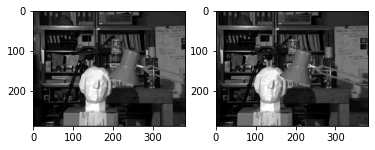

In [ ]:
plt.subplot(1,2,1)
plt.imshow(left[0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(right[0], cmap = 'gray')
plt.show()

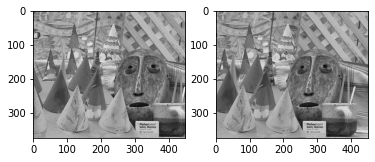

In [ ]:
plt.subplot(1,2,1)
plt.imshow(left[1], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(right[1], cmap = 'gray')
plt.show()

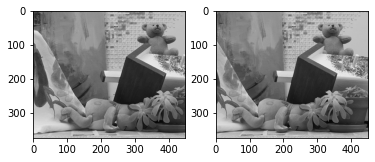

In [ ]:
plt.subplot(1,2,1)
plt.imshow(left[2], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(right[2], cmap = 'gray')
plt.show()

# ***Output***

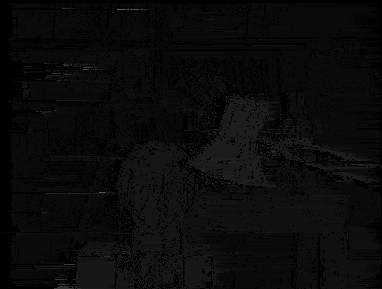

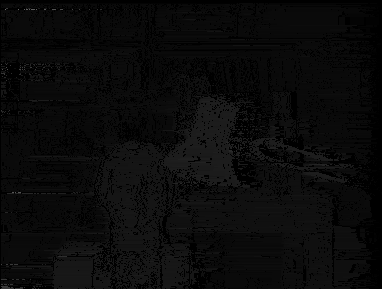

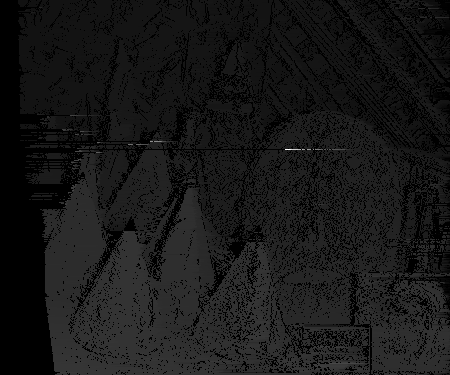

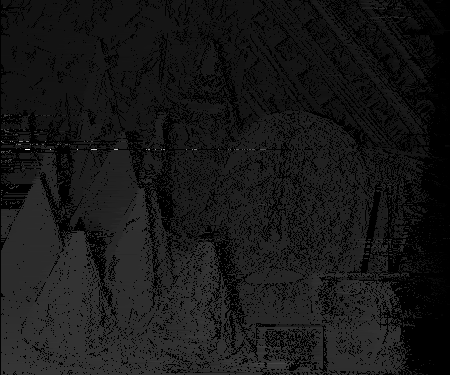

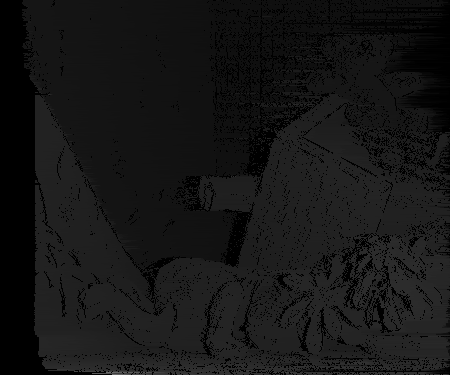

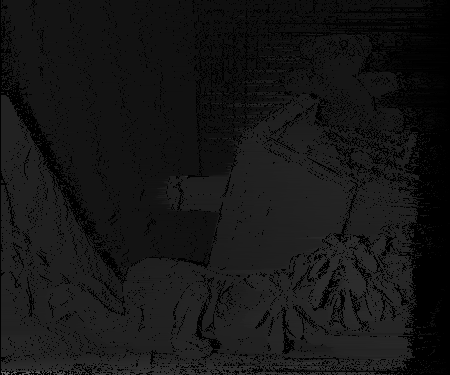

In [ ]:
for i in range(3):
  left_disp, right_disp = stereo_matching(left[i], right[i])
  cv2_imshow(left_disp)
  cv2_imshow(right_disp)
  print("\n")
